## Extrae la informacion

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

df = pd.read_excel(r'D:\alex_\Documents\Programacion\Data Analysis\04 - PIB por actividad economica y estado\Datos Ejercicio 2.xlsx')
df.head()

,Mes,Número de solicitudes
0,2020-01-01,51832
1,2020-02-01,46618
2,2020-03-01,57050
3,2020-04-01,67542
4,2020-05-01,64922


## Analisis

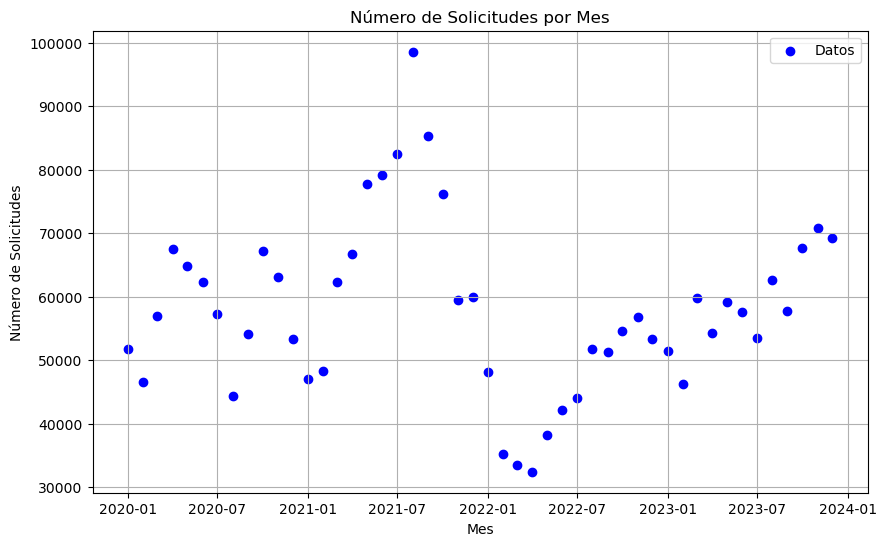

In [6]:
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.scatter(df['Mes'], df['Número de solicitudes'], color='blue', label='Datos')
plt.title('Número de Solicitudes por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Solicitudes')
plt.legend()
plt.grid(True)
plt.show()


## Random Forest

Mean Squared Error: 125556144.65499
R^2: 0.6478314608488662


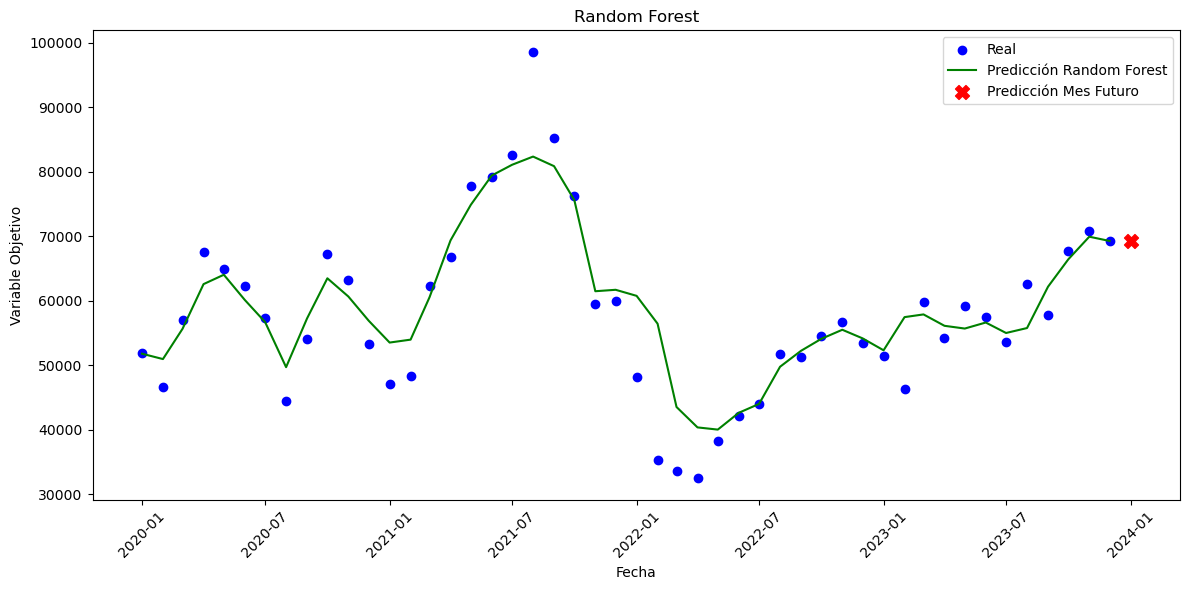

Predicted Number of Solicitudes for Next Month: [69252.3]


In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

months = df['Mes']  # Asumiendo que la columna 'Mes' es de tipo Timestamp

reference_date = pd.Timestamp('1970-01-01')
days_since_reference = (months - reference_date).dt.days.values

X = days_since_reference.reshape(-1, 1)
y = df['Número de solicitudes']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones sobre el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R cuadrado
r2 = rf_model.score(X_test, y_test)
print("R^2:", r2)

# Prediccion para el mes próximo
ultimo_mes = df['Mes'].max()
mes_proximo = ultimo_mes + pd.DateOffset(months=1)
days_proximo = (mes_proximo - reference_date).days
predicted_solicitudes_proximo_mes = rf_model.predict([[days_proximo]])

# Predicción total
y_pred_total = rf_model.predict(X)

# Convertir los días transcurridos de vuelta a fechas de tipo Timestamp
fechas = reference_date + pd.to_timedelta(X.flatten(), unit='D')

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.scatter(fechas, y, label='Real', color='blue')
plt.plot(fechas, y_pred_total, label='Predicción Random Forest', color='green')
plt.scatter(mes_proximo, predicted_solicitudes_proximo_mes, label='Predicción Mes Futuro', color='red', marker='X', s=100)
plt.xlabel('Fecha')
plt.ylabel('Variable Objetivo')
plt.title('Random Forest')
plt.legend()
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()

print("Predicted Number of Solicitudes for Next Month:", predicted_solicitudes_proximo_mes)
